In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("sui.csv")


In [3]:
df.columns = [col.capitalize() for col in df.columns]

In [4]:
paises_selecc = ['Germany', 'Belgium', 'Croatia', 'Denmark', 'Spain', 'France', 'Ireland', 'Latvia', 'Luxembourg', 'Netherlands', 'Sweden', 'Bulgaria', 'Slovakia', 'Estonia', 'Greece', 'Malta', 'Poland', 'Czech Republic', 'Austria', 'Cyprus', 'Slovenia', 'Finland', 'Hungary', 'Italy', 'Lithuania', 'Portugal', 'Romania', 'Norway', 'Switzerland']

# Filtrar y eliminar las filas que no contengan las palabras permitidas
df_filtrado = df[df['Country'].isin(paises_selecc)]

In [5]:
df_filtrado

,Country,Year,Sex,Age,Suicides_no,Population,Suicides/100k_pop,Country-year,Hdi_for_year,Gdp_for_year($),Gdp_per_capita($),Generation
1786,Austria,1985,male,75+ years,152,156535,97.10,Austria1985,0.764,"69,386,774,475",9759,G.I. Generation
1787,Austria,1985,male,55-74 years,355,584253,60.76,Austria1985,0.764,"69,386,774,475",9759,G.I. Generation
1788,Austria,1985,male,35-54 years,515,940526,54.76,Austria1985,0.764,"69,386,774,475",9759,Silent
1789,Austria,1985,male,25-34 years,232,548783,42.28,Austria1985,0.764,"69,386,774,475",9759,Boomers
1790,Austria,1985,female,75+ years,110,339223,32.43,Austria1985,0.764,"69,386,774,475",9759,G.I. Generation
...,...,...,...,...,...,...,...,...,...,...,...,...
24973,Switzerland,2015,female,55-74 years,82,922222,8.89,Switzerland2015,NaN,"679,289,166,858",86068,Boomers
24974,Switzerland,2015,female,15-24 years,20,462559,4.32,Switzerland2015,NaN,"679,289,166,858",86068,Millenials
24975,Switzerland,2015,female,25-34 years,24,577973,4.15,Switzerland2015,NaN,"679,289,166,858",86068,Millenials
24976,Switzerland,2015,female,5-14 years,2,390910,0.51,Switzerland2015,NaN,"679,289,166,858",86068,Generation Z


In [6]:
df_country_year_sortedby=df_filtrado.groupby(["Country"])["Suicides_no"].sum()

In [7]:
df_country_year_sortedby

Country
Austria            50073
Belgium            62761
Bulgaria           36388
Croatia            18429
Cyprus               412
Czech Republic     43687
Denmark            15297
Estonia             7034
Finland            33677
France            329127
Germany           291262
Greece             12368
Hungary            73891
Ireland            12574
Italy             132060
Latvia             12770
Lithuania          28039
Luxembourg          1958
Malta                585
Netherlands        50833
Norway             16992
Poland            139098
Portugal           24061
Romania            72777
Slovakia           13437
Slovenia           10615
Spain             100202
Sweden             37795
Switzerland        26217
Name: Suicides_no, dtype: int64

In [8]:
df_filtrado2 = df_filtrado.sort_values(by='Country-year')
suicides_sum = df_filtrado2.groupby('Country')['Suicides/100k_pop'].sum()

# Mostrar la suma de suicidios por país
print(suicides_sum)

Country
Austria            9076.23
Belgium            7900.50
Bulgaria           7016.08
Croatia            5982.84
Cyprus              586.26
Czech Republic     5952.99
Denmark            3721.65
Estonia            6873.78
Finland            7924.11
France             7803.25
Germany            4854.69
Greece             1512.12
Hungary           10156.07
Ireland            3881.73
Italy              3168.87
Latvia             7373.35
Lithuania         10588.88
Luxembourg         6156.56
Malta              1872.01
Netherlands        4066.52
Norway             4658.76
Poland             4397.62
Portugal           3673.36
Romania            4171.55
Slovakia           3318.16
Slovenia           7012.62
Spain              3509.06
Sweden             5247.72
Switzerland        4794.07
Name: Suicides/100k_pop, dtype: float64


In [9]:
import matplotlib.pyplot as plt
df1=df_filtrado.groupby(["Country","Year"])["Suicides_no"].sum().sort_values(ascending=False)
df1

Country   Year
Germany   1991    14010
          1990    13924
          1992    13458
          1995    12888
          1994    12718
                  ...  
Malta     1986        1
          1987        1
Cyprus    1999        1
Slovakia  2007        0
          2006        0
Name: Suicides_no, Length: 774, dtype: int64

In [10]:
dataframes_by_country = {}
for group, data in df1.groupby(level='Country'):
    dataframes_by_country[group] = pd.DataFrame(data).reset_index().sort_values(by="Year")
    

In [11]:
dataframes_by_country

{'Austria':     Country  Year  Suicides_no
 1   Austria  1985         2091
 0   Austria  1986         2139
 2   Austria  1987         2069
 4   Austria  1988         1851
 3   Austria  1989         1898
 5   Austria  1990         1825
 9   Austria  1991         1769
 10  Austria  1992         1759
 11  Austria  1993         1704
 8   Austria  1994         1776
 6   Austria  1995         1788
 7   Austria  1996         1779
 12  Austria  1997         1592
 14  Austria  1998         1559
 15  Austria  1999         1555
 13  Austria  2000         1588
 17  Austria  2001         1489
 16  Austria  2002         1553
 18  Austria  2003         1456
 19  Austria  2004         1422
 20  Austria  2005         1399
 22  Austria  2006         1297
 25  Austria  2007         1285
 28  Austria  2008         1267
 26  Austria  2009         1278
 29  Austria  2010         1264
 24  Austria  2011         1288
 27  Austria  2012         1276
 23  Austria  2013         1291
 21  Austria  2014         13

In [12]:
selected_countries = ["France","Germany","Spain","Italy","Poland","Chipre","Malta","Luxebourg","Estonia","Slovenia"]

nuevo_dataframes_by_country = {}

for country in dataframes_by_country.keys():
    if country in selected_countries:
        nuevo_dataframes_by_country[country] = dataframes_by_country[country]
    

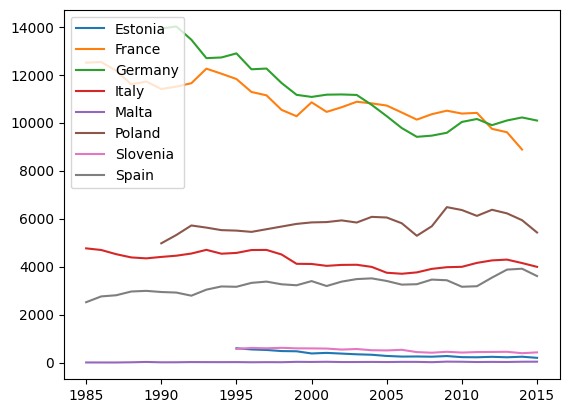

In [13]:
for country in nuevo_dataframes_by_country.keys():
    plt.plot(dataframes_by_country[country]["Year"], dataframes_by_country[country]["Suicides_no"],label=country)
plt.legend()

In [14]:
#Lista de los mas y los menos para poder hacer el plot
ordered_dataframes_by_country = dict(sorted(dataframes_by_country.items(), key=lambda x: sum(x[1]["Suicides_no"])))

print(ordered_dataframes_by_country)

{'Cyprus':    Country  Year  Suicides_no
14  Cyprus  1999            1
12  Cyprus  2000            7
13  Cyprus  2004            7
11  Cyprus  2005           17
10  Cyprus  2006           19
9   Cyprus  2007           19
2   Cyprus  2008           41
7   Cyprus  2009           32
4   Cyprus  2010           38
8   Cyprus  2011           30
6   Cyprus  2012           36
0   Cyprus  2013           45
1   Cyprus  2014           44
3   Cyprus  2015           40
5   Cyprus  2016           36, 'Malta':    Country  Year  Suicides_no
28   Malta  1985            2
29   Malta  1986            1
30   Malta  1987            1
26   Malta  1988            9
11   Malta  1989           23
27   Malta  1990            8
24   Malta  1991           10
17   Malta  1992           18
19   Malta  1993           16
21   Malta  1994           15
18   Malta  1995           17
25   Malta  1996           10
20   Malta  1997           15
23   Malta  1998           12
5    Malta  1999           27
10   Malta  2000   

In [15]:
df_filtrado

,Country,Year,Sex,Age,Suicides_no,Population,Suicides/100k_pop,Country-year,Hdi_for_year,Gdp_for_year($),Gdp_per_capita($),Generation
1786,Austria,1985,male,75+ years,152,156535,97.10,Austria1985,0.764,"69,386,774,475",9759,G.I. Generation
1787,Austria,1985,male,55-74 years,355,584253,60.76,Austria1985,0.764,"69,386,774,475",9759,G.I. Generation
1788,Austria,1985,male,35-54 years,515,940526,54.76,Austria1985,0.764,"69,386,774,475",9759,Silent
1789,Austria,1985,male,25-34 years,232,548783,42.28,Austria1985,0.764,"69,386,774,475",9759,Boomers
1790,Austria,1985,female,75+ years,110,339223,32.43,Austria1985,0.764,"69,386,774,475",9759,G.I. Generation
...,...,...,...,...,...,...,...,...,...,...,...,...
24973,Switzerland,2015,female,55-74 years,82,922222,8.89,Switzerland2015,NaN,"679,289,166,858",86068,Boomers
24974,Switzerland,2015,female,15-24 years,20,462559,4.32,Switzerland2015,NaN,"679,289,166,858",86068,Millenials
24975,Switzerland,2015,female,25-34 years,24,577973,4.15,Switzerland2015,NaN,"679,289,166,858",86068,Millenials
24976,Switzerland,2015,female,5-14 years,2,390910,0.51,Switzerland2015,NaN,"679,289,166,858",86068,Generation Z


In [16]:
df_country_year_sortedbypop=df_filtrado.groupby(["Country"])["Suicides/100k_pop"].sum()
df_country_year_sortedbypop=df_country_year_sortedbypop.sort_values()

esta es la tabla que tiene los valores por ratio en vez de por numeros totales. Los paises cambian.

In [17]:
dataframes_by_country2 = {}
for group, data in df_filtrado.groupby(level='Country'):
    dataframes_by_country[group] = pd.DataFrame(data).reset_index().sort_values(by="Year")

ValueError: level name Country is not the name of the index

In [ ]:
selected_countries2 = ["France","Germany","Spain","Italy","Poland","Chipre","Malta","Luxebourg","Estonia","Slovenia"]

nuevo_dataframes_by_country2 = {}

for country in dataframes_by_country.keys():
    if country in selected_countries:
        nuevo_dataframes_by_country2[country] = dataframes_by_country[country]

In [ ]:
dataframes_by_country = {}
for group, data in df1.groupby(level='Country'):
    dataframes_by_country[group] = pd.DataFrame(data).reset_index().sort_values(by="Year")

# for country in nuevo_dataframes_by_country.keys():
#     plt.plot(dataframes_by_country[country]["Year"], dataframes_by_country[country]["Suicides_no"],label=country)
# plt.legend()

In [ ]:
dataframes_by_country

{'Austria':     Country  Year  Suicides_no
 1   Austria  1985         2091
 0   Austria  1986         2139
 2   Austria  1987         2069
 4   Austria  1988         1851
 3   Austria  1989         1898
 5   Austria  1990         1825
 9   Austria  1991         1769
 10  Austria  1992         1759
 11  Austria  1993         1704
 8   Austria  1994         1776
 6   Austria  1995         1788
 7   Austria  1996         1779
 12  Austria  1997         1592
 14  Austria  1998         1559
 15  Austria  1999         1555
 13  Austria  2000         1588
 17  Austria  2001         1489
 16  Austria  2002         1553
 18  Austria  2003         1456
 19  Austria  2004         1422
 20  Austria  2005         1399
 22  Austria  2006         1297
 25  Austria  2007         1285
 28  Austria  2008         1267
 26  Austria  2009         1278
 29  Austria  2010         1264
 24  Austria  2011         1288
 27  Austria  2012         1276
 23  Austria  2013         1291
 21  Austria  2014         13

In [ ]:
df_basta=df_filtrado.groupby(["Country","Year"])["Suicides/100k_pop"].sum().sort_values(ascending=False)
df_basta

Country    Year
Lithuania  1995    639.30
           1996    595.61
Hungary    1991    575.00
Lithuania  2000    571.80
Hungary    1992    570.26
                    ...  
Cyprus     2000      8.36
Malta      1986      3.61
Cyprus     1999      1.57
Slovakia   2006      0.00
           2007      0.00
Name: Suicides/100k_pop, Length: 774, dtype: float64

In [ ]:
dataframes_by_country2 = {}
for group, data in df_basta.groupby(level='Country'):
    dataframes_by_country2[group] = pd.DataFrame(data).reset_index().sort_values(by="Year")

In [ ]:
dataframes_by_country2


{'Austria':     Country  Year  Suicides/100k_pop
 2   Austria  1985             384.81
 1   Austria  1986             401.80
 0   Austria  1987             405.88
 4   Austria  1988             357.64
 3   Austria  1989             359.32
 6   Austria  1990             353.78
 5   Austria  1991             355.47
 11  Austria  1992             341.74
 8   Austria  1993             347.96
 9   Austria  1994             343.62
 7   Austria  1995             348.09
 10  Austria  1996             342.65
 12  Austria  1997             297.50
 14  Austria  1998             289.38
 15  Austria  1999             280.30
 13  Austria  2000             289.77
 17  Austria  2001             261.91
 16  Austria  2002             276.92
 18  Austria  2003             257.06
 19  Austria  2004             254.04
 20  Austria  2005             235.25
 21  Austria  2006             218.90
 22  Austria  2007             217.31
 23  Austria  2008             216.45
 24  Austria  2009             213.22
 

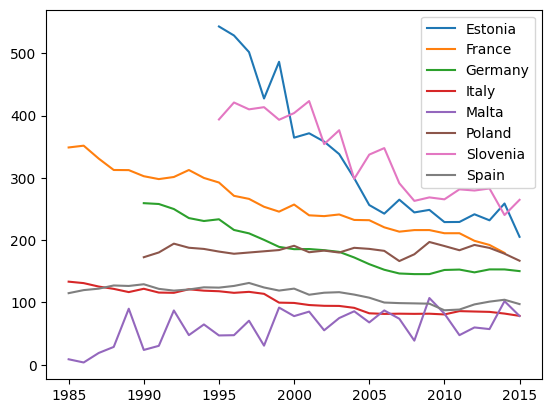

In [ ]:
for country in nuevo_dataframes_by_country2.keys():
    plt.plot(dataframes_by_country2[country]["Year"], dataframes_by_country2[country]["Suicides/100k_pop"],label=country)
plt.legend()

In [ ]:
df_basta

Country    Year
Lithuania  1995    639.30
           1996    595.61
Hungary    1991    575.00
Lithuania  2000    571.80
Hungary    1992    570.26
                    ...  
Cyprus     2000      8.36
Malta      1986      3.61
Cyprus     1999      1.57
Slovakia   2006      0.00
           2007      0.00
Name: Suicides/100k_pop, Length: 774, dtype: float64

In [ ]:
df_filtrado

,Country,Year,Sex,Age,Suicides_no,Population,Suicides/100k_pop,Country-year,Hdi_for_year,Gdp_for_year($),Gdp_per_capita($),Generation
1786,Austria,1985,male,75+ years,152,156535,97.10,Austria1985,0.764,"69,386,774,475",9759,G.I. Generation
1787,Austria,1985,male,55-74 years,355,584253,60.76,Austria1985,0.764,"69,386,774,475",9759,G.I. Generation
1788,Austria,1985,male,35-54 years,515,940526,54.76,Austria1985,0.764,"69,386,774,475",9759,Silent
1789,Austria,1985,male,25-34 years,232,548783,42.28,Austria1985,0.764,"69,386,774,475",9759,Boomers
1790,Austria,1985,female,75+ years,110,339223,32.43,Austria1985,0.764,"69,386,774,475",9759,G.I. Generation
...,...,...,...,...,...,...,...,...,...,...,...,...
24973,Switzerland,2015,female,55-74 years,82,922222,8.89,Switzerland2015,NaN,"679,289,166,858",86068,Boomers
24974,Switzerland,2015,female,15-24 years,20,462559,4.32,Switzerland2015,NaN,"679,289,166,858",86068,Millenials
24975,Switzerland,2015,female,25-34 years,24,577973,4.15,Switzerland2015,NaN,"679,289,166,858",86068,Millenials
24976,Switzerland,2015,female,5-14 years,2,390910,0.51,Switzerland2015,NaN,"679,289,166,858",86068,Generation Z


In [ ]:
edades=df_filtrado.groupby("Country")["Age"].sum()
edades

Country
Austria           75+ years55-74 years35-54 years25-34 years75+ ...
Belgium           75+ years55-74 years35-54 years25-34 years75+ ...
Bulgaria          75+ years75+ years55-74 years35-54 years55-74 ...
Croatia           75+ years55-74 years35-54 years75+ years25-34 ...
Cyprus            55-74 years15-24 years25-34 years35-54 years5-...
Czech Republic    75+ years55-74 years35-54 years75+ years25-34 ...
Denmark           75+ years55-74 years35-54 years75+ years25-34 ...
Estonia           35-54 years75+ years55-74 years25-34 years75+ ...
Finland           75+ years35-54 years55-74 years25-34 years15-2...
France            75+ years55-74 years35-54 years25-34 years75+ ...
Germany           75+ years55-74 years35-54 years75+ years25-34 ...
Greece            75+ years55-74 years35-54 years25-34 years75+ ...
Hungary           75+ years35-54 years55-74 years75+ years25-34 ...
Ireland           55-74 years25-34 years15-24 years35-54 years55...
Italy             75+ years55-74 years35

In [ ]:
df1

Country    Year
Lithuania  1995    639.30
           1996    595.61
Hungary    1991    575.00
Lithuania  2000    571.80
Hungary    1992    570.26
                    ...  
Cyprus     2000      8.36
Malta      1986      3.61
Cyprus     1999      1.57
Slovakia   2006      0.00
           2007      0.00
Name: Suicides/100k_pop, Length: 774, dtype: float64